# Linear Regression with NNs - from raw Python through TF to Keras

## Linear regression

Linear regression is just line fitting in short. We have a bunch of data points, ploted on a 2D cartesian plane (in simplest case, single variate LR case). Let's generate some data like that - we will represent house price dependency on the size of the flat. 

<font color='red'>Note: </font> this example is only used because we are learning the fundamentals of DL. We will use this example to transition from raw python NeuralNets to frameworks we will use in latter parts of the couse.

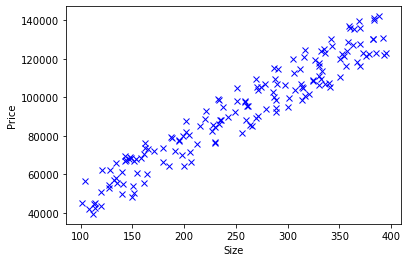

In [65]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation # import animation support

num_house = 160
np.random.seed(42)

#  generation some house sizes between 100 and 400 m^2 (typical lithuanian houses)
house_sizes = np.random.randint(low=100, high=400, size=num_house)

# Generate house prices from house size with a random noise added.
house_prices = house_sizes * 300.0 + np.random.randint(low=3000, high=30000, size=num_house)  

# Plot generated house and size 
plt.plot(house_sizes, house_prices, "bx")  # bx = blue x, can use r, g, y, etc.
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

In [2]:
# we will use zip() function for pairing if we have [a, b] and [c, d] zip will create [(a, c), (b, d)]
# you can use simple experiments in jdoole, for example to understand zip():
# a = ["a", "b"]
# b = ["c", "d"]
# print(list(zip(a, b)))

for size_to_price in list(zip(house_sizes, house_prices)):
    print(size_to_price)

(202, 87254.0)
(370, 129795.0)
(206, 65660.0)
(171, 59690.0)
(288, 110975.0)
(120, 50964.0)
(202, 74884.0)
(221, 91418.0)
(314, 103465.0)
(187, 75950.0)
(199, 67126.0)
(251, 100262.0)
(230, 86423.0)
(249, 89063.0)
(357, 126123.0)
(393, 129222.0)
(291, 91985.0)
(376, 116569.0)
(260, 107967.0)
(121, 62633.0)
(352, 111033.0)
(335, 108811.0)
(148, 52451.0)
(158, 56820.0)
(269, 101268.0)
(287, 110039.0)
(370, 133769.0)
(289, 96096.0)
(274, 93866.0)
(150, 73658.0)
(154, 68142.0)
(343, 130133.0)
(230, 90431.0)
(234, 75947.0)
(120, 64551.0)
(266, 109182.0)
(373, 115089.0)
(188, 78518.0)
(113, 39905.0)
(341, 126342.0)
(364, 114099.0)
(152, 72718.0)
(191, 61567.0)
(363, 129812.0)
(134, 54594.0)
(305, 98056.0)
(180, 60890.0)
(149, 56538.0)
(101, 47802.0)
(153, 70677.0)
(205, 75127.0)
(359, 119492.0)
(290, 100555.0)
(317, 108353.0)
(143, 54333.0)
(261, 91533.0)
(301, 104316.0)
(369, 137597.0)
(370, 116612.0)
(314, 120625.0)
(351, 134239.0)
(289, 112319.0)
(395, 143370.0)
(312, 120083.0)
(307, 1211

## Solving linear regression with simplest NN

How will our NN look like for linear regression of one variable? Well we are modeling the equation: y = mx + b, where m is the slope, x is the input, b is the offset. Let's get back to the slides to understand the Neural Network that can solve Linear Regression.

## Learning rate and gradient descent

In [66]:
weight = 500
bias = 2
learning_rate = 0.01

# training loop
for i in range(len(house_sizes)):
    prediction = house_sizes[i] * weight + bias # mx+b
    print("price[" + str(i) + "]: " + str(house_prices[i]) + " ;; pred: " + str(prediction) + " ;; error: " + str(house_prices[i] - prediction))
    error = prediction - house_prices[i]
    weight = weight - learning_rate * error * house_sizes[i] # weight adjustments
    bias = bias - learning_rate * error # we don't need to multiply error by the input house_sizes[i], because the bias is not dependent on it, like the weight was
#     print(weight)
#     print(bias)

price[0]: 81837.0 ;; pred: 101002 ;; error: -19165.0
price[1]: 127808.0 ;; pred: -14139110.650000002 ;; error: 14266918.650000002
price[2]: 71385.0 ;; pred: 10866515934.766504 ;; error: -10866444549.766504
price[3]: 71975.0 ;; pred: -3818902134111.155 ;; error: 3818902206086.155
price[4]: 109365.0 ;; pred: 1874339386554002.0 ;; error: -1874339386444637.0
price[5]: 50649.0 ;; pred: -6.470094383911085e+17 ;; error: 6.470094383911592e+17
price[6]: 87538.0 ;; pred: 1.5575243818774e+20 ;; error: -1.557524381877399e+20
price[7]: 92964.0 ;; pred: -6.936215916696907e+22 ;; error: 6.936215916696907e+22
price[8]: 98836.0 ;; pred: 4.803532024654877e+25 ;; error: -4.803532024654877e+25
price[9]: 79180.0 ;; pred: -2.817725239372683e+28 ;; error: 2.817725239372683e+28
price[10]: 79782.0 ;; pred: 1.0455897318259162e+31 ;; error: -1.0455897318259162e+31
price[11]: 105036.0 ;; pred: -5.209532692381736e+33 ;; error: 5.209532692381736e+33
price[12]: 76737.0 ;; pred: 3.0027416345389836e+36 ;; error: -3.00

<ipython-input-66-ecd195540d83>:7: RuntimeWarning: overflow encountered in multiply
  prediction = house_sizes[i] * weight + bias # mx+b
<ipython-input-66-ecd195540d83>:10: RuntimeWarning: invalid value encountered in double_scalars
  weight = weight - learning_rate * error * house_sizes[i] # weight adjustments
<ipython-input-66-ecd195540d83>:11: RuntimeWarning: invalid value encountered in double_scalars
  bias = bias - learning_rate * error # we don't need to multiply error by the input house_sizes[i], because the bias is not dependent on it, like the weight was


As you can see the bias and the weight go to infinity. The neural network does not converge. Why is that?

<!-- 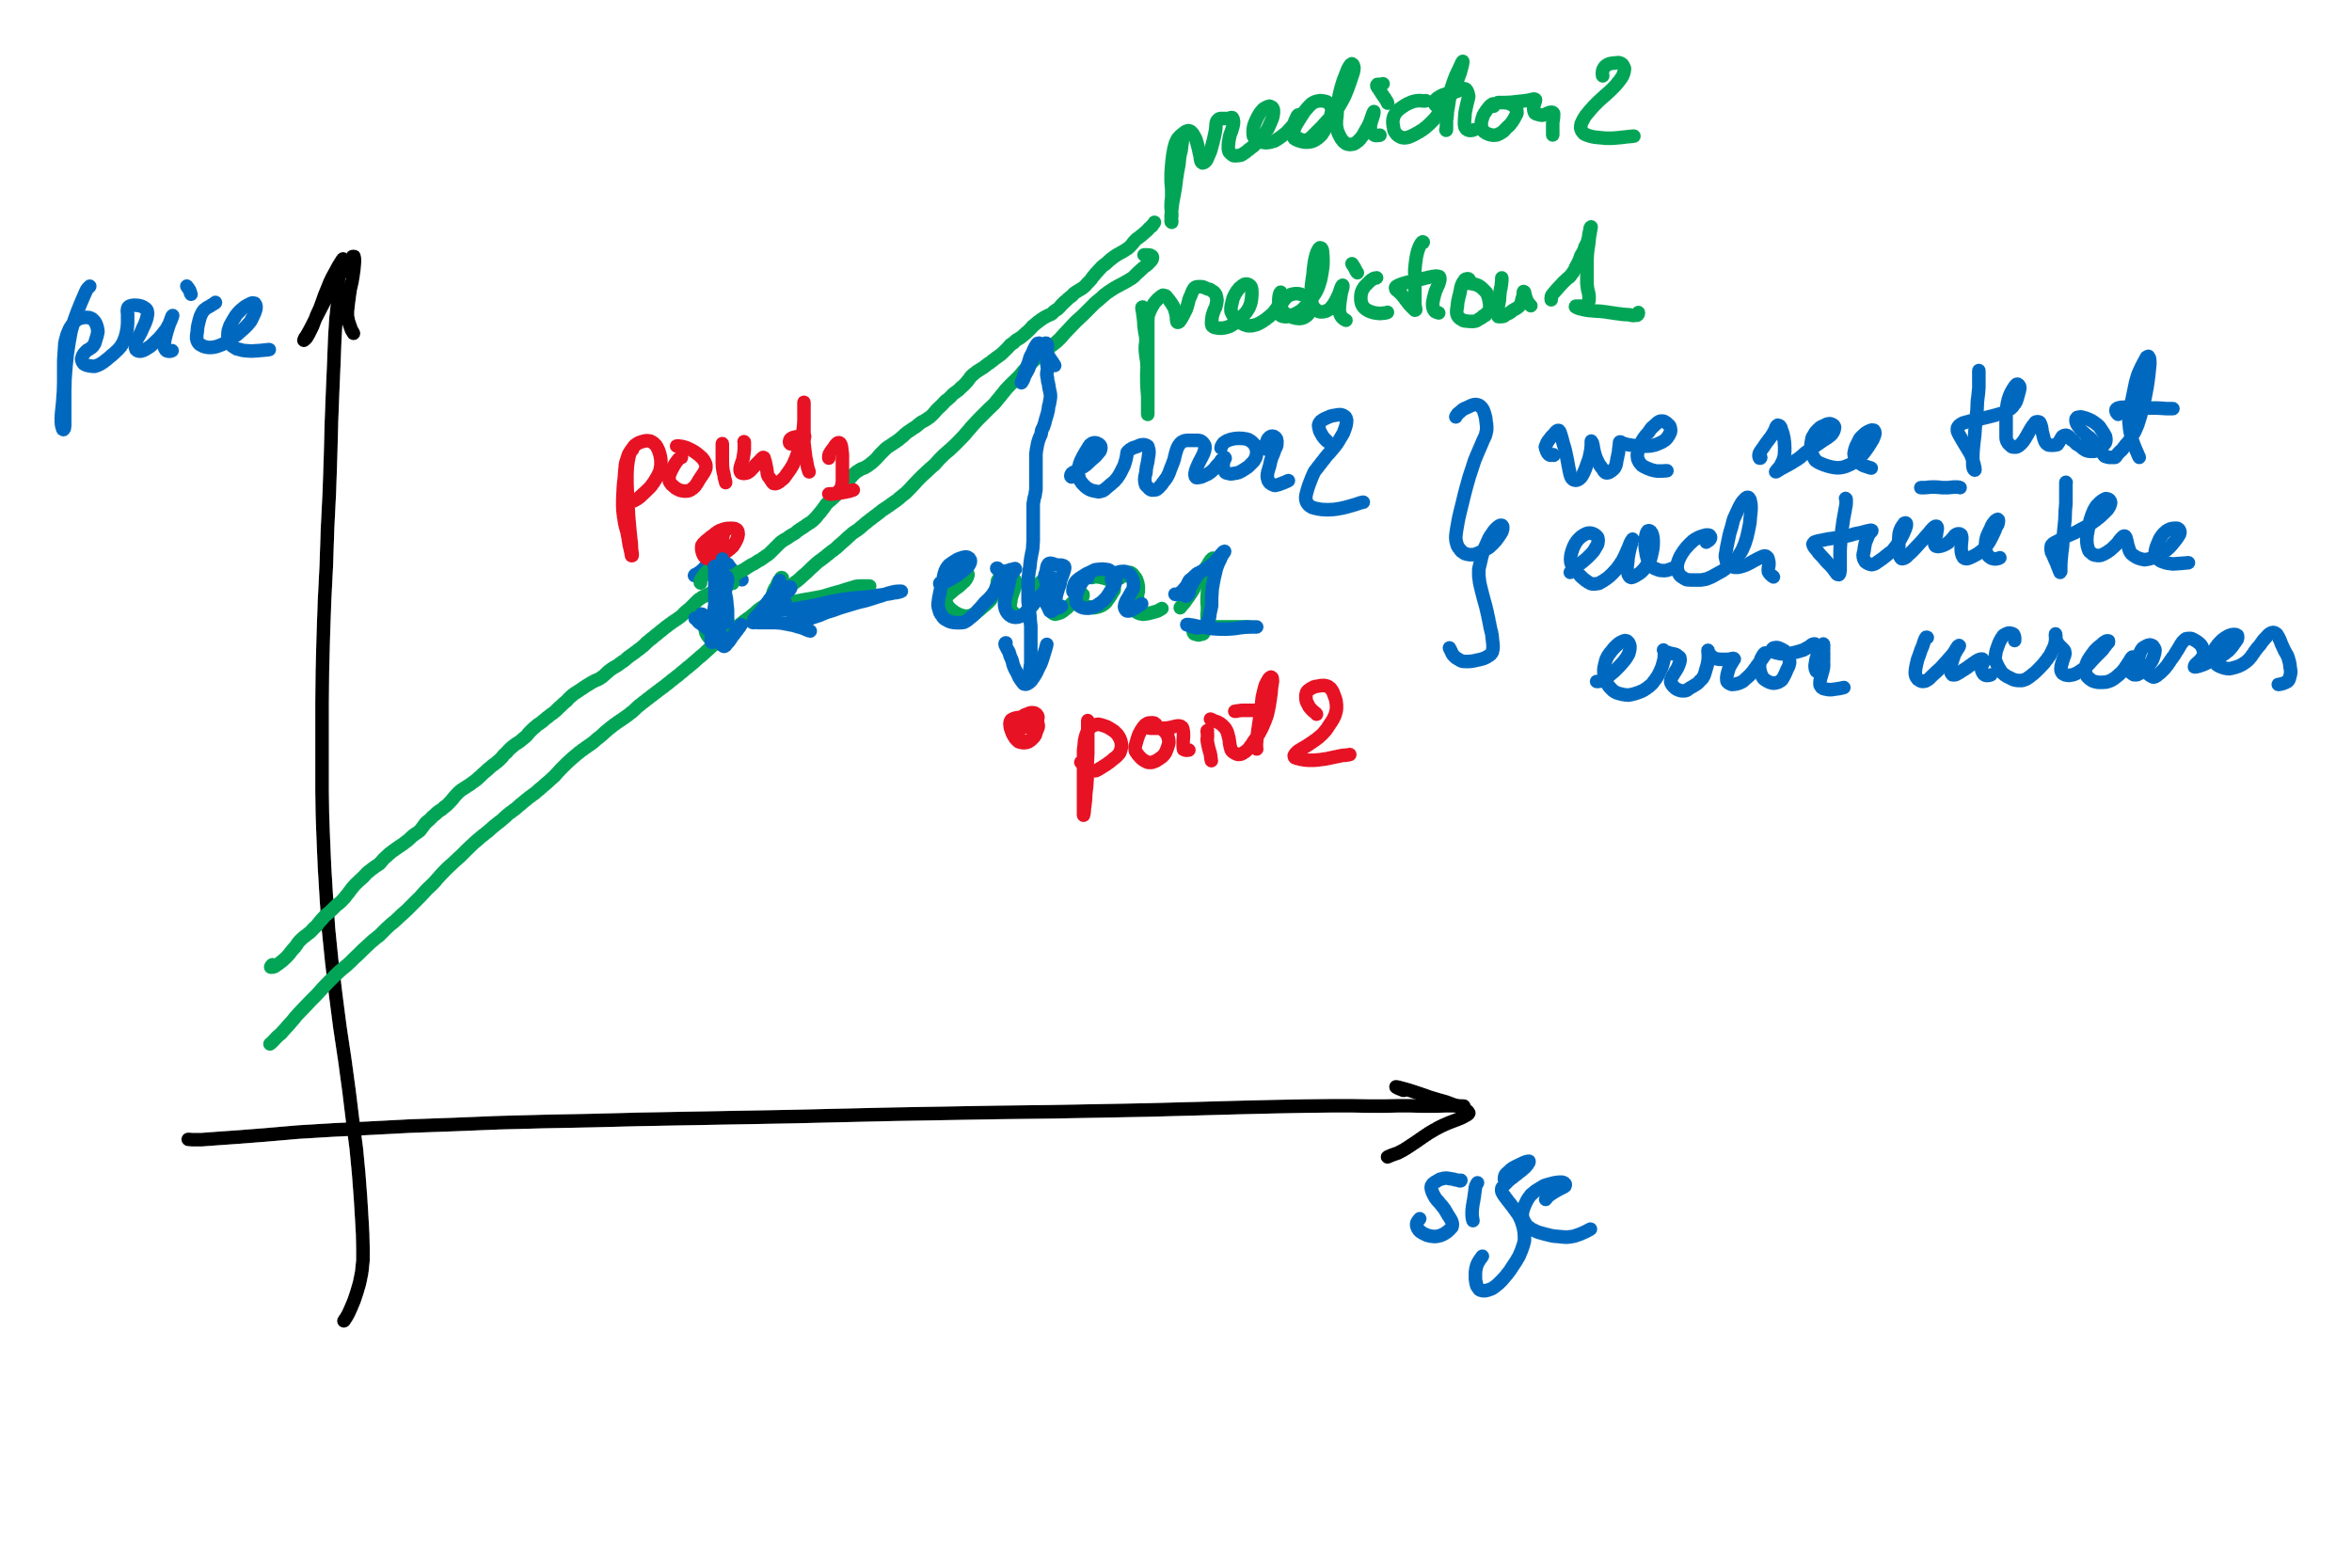 -->

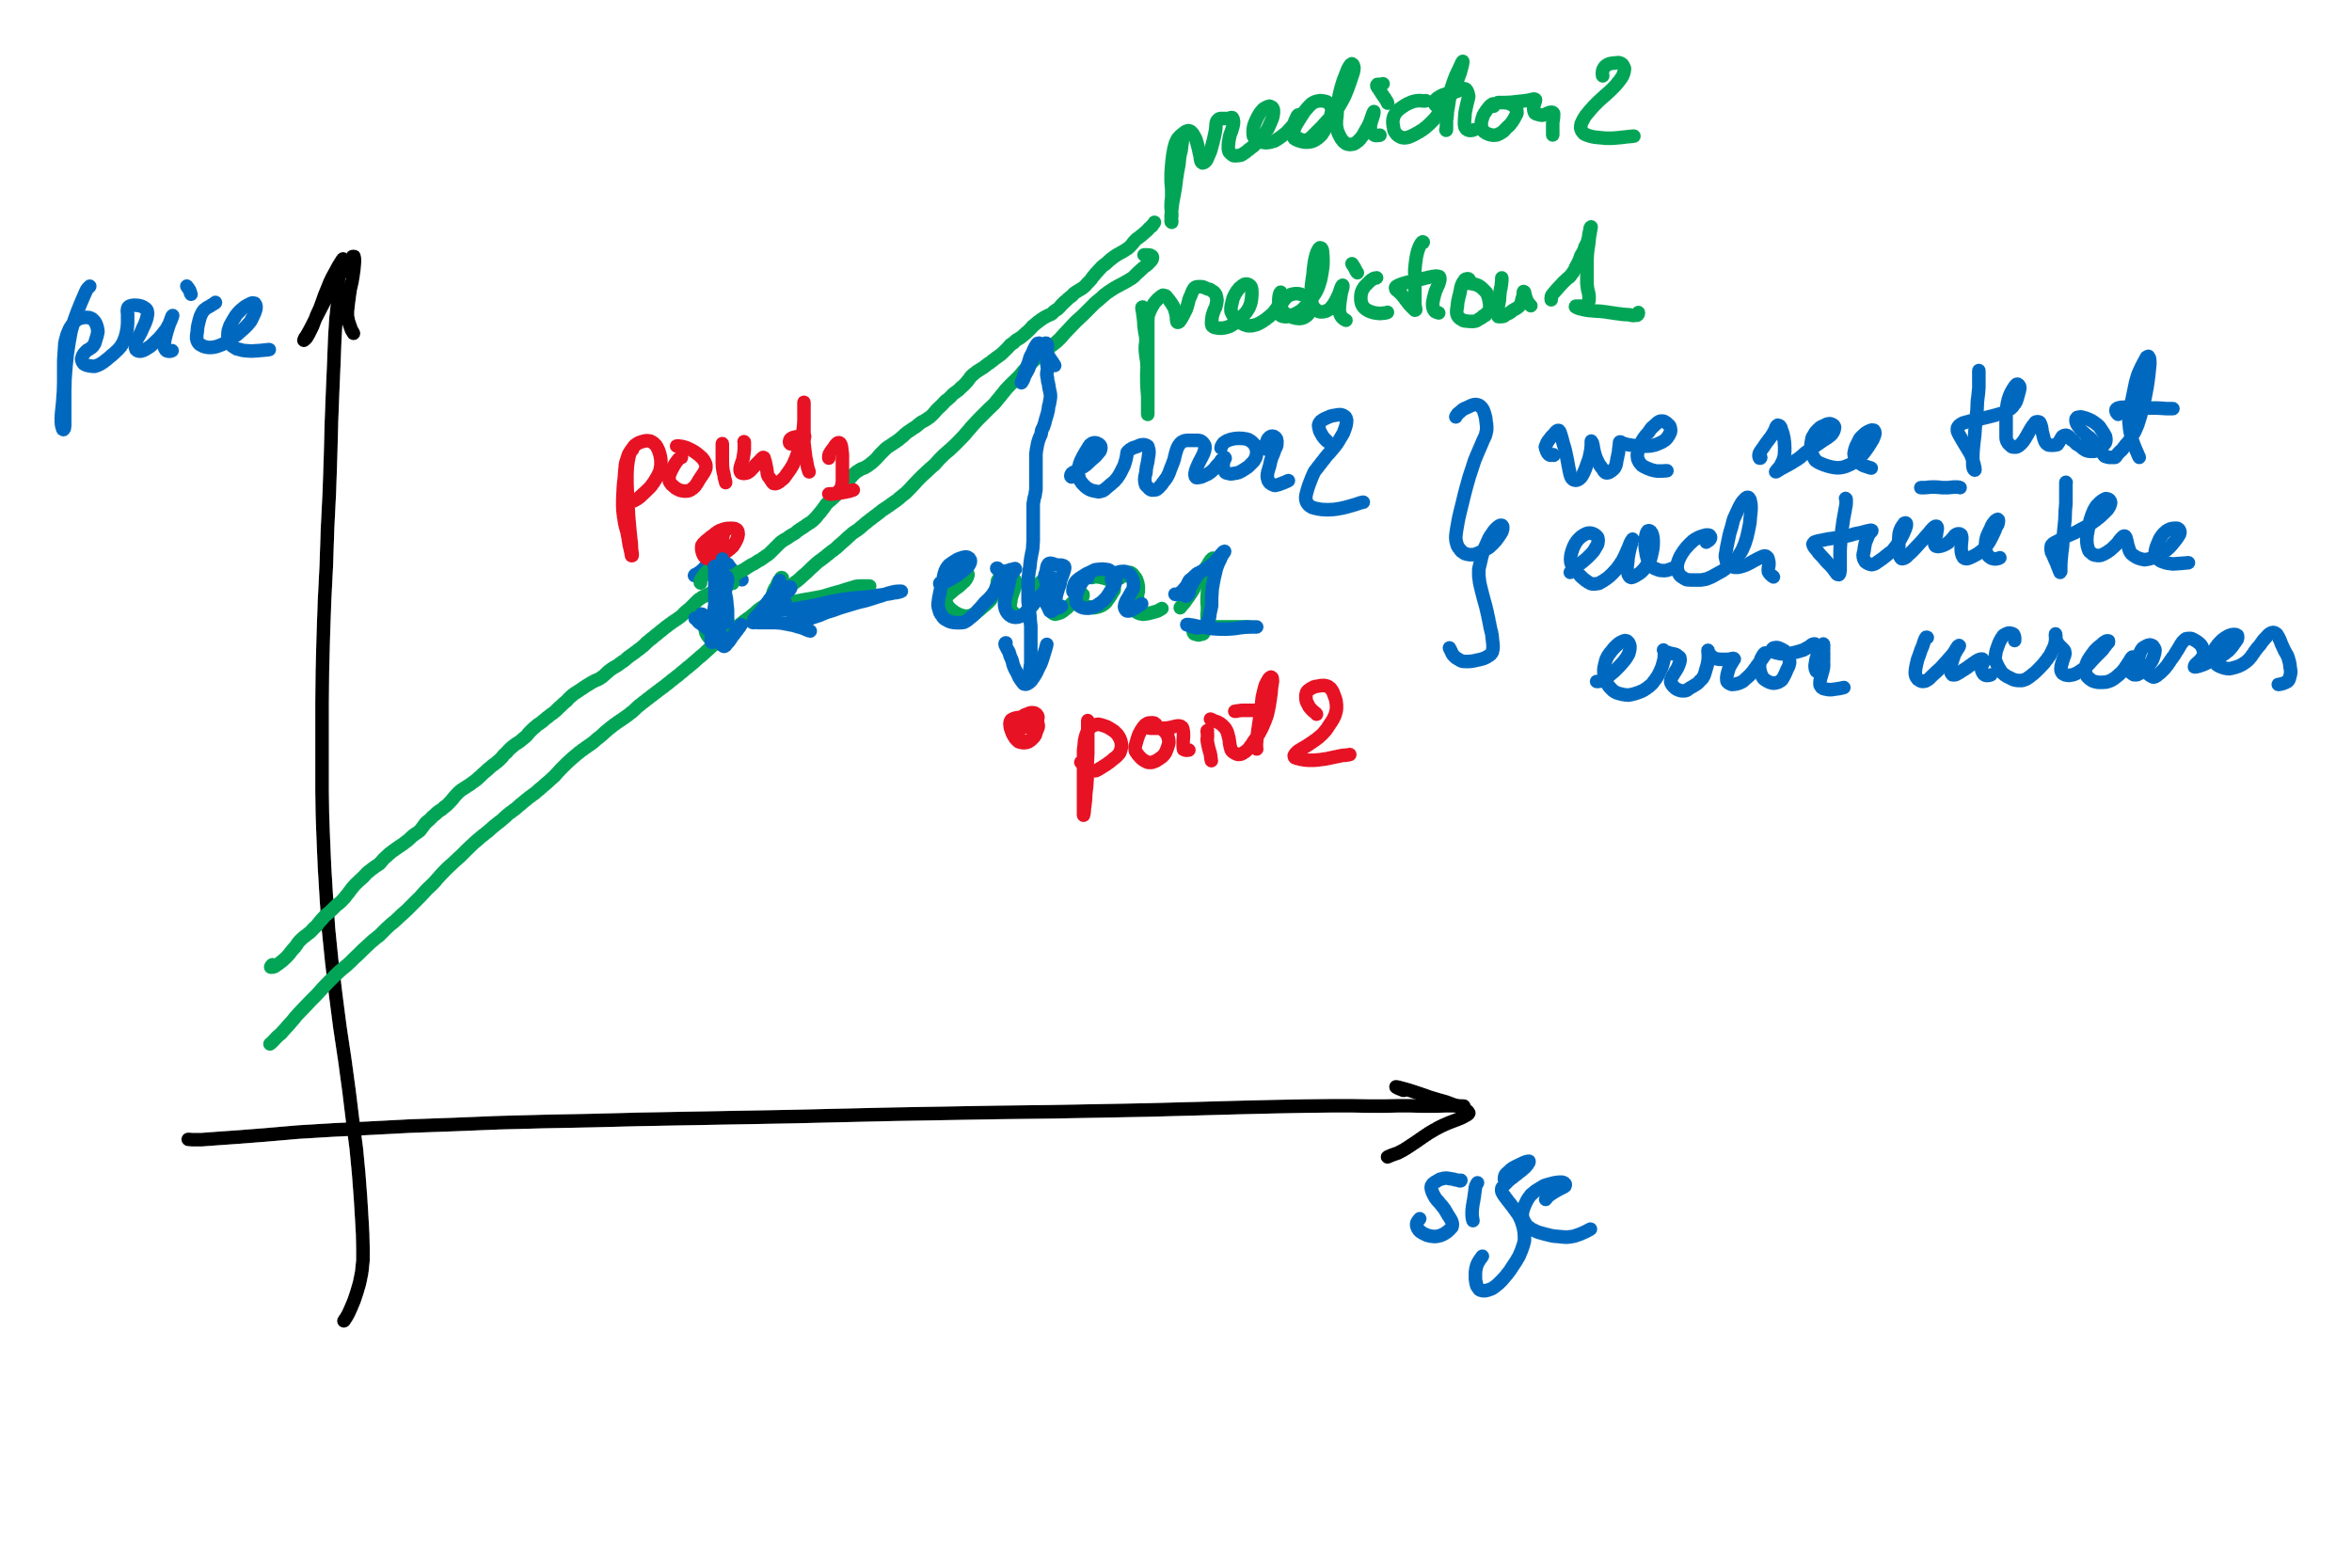

Our network does not converge, it actually diverges. Let's introduce some additional concepts that might help to create a LinerRegressor NN (we will also use these concepts in the future).

### Data / feature Normalization

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges (different by 2 or more orders of magnitude (10x, 100x, etc.)

In [77]:
def normalize(arr):
#     print(arr.mean())
#     print(arr - arr.mean())
#     print(arr.std())
    return (arr - arr.mean()) / arr.std()

To be completelly technically correct, this is called standartization, however standartization and normalization are ussually refered to by the same one name - normalization.

In [82]:
house_sizes_norm = normalize(house_sizes)
house_prices_norm = normalize(house_prices)

# for n in list(zip(house_sizes, house_sizes_norm)):
#     print(n)

# for n in list(zip(house_prices, house_prices_norm)):
#     print(n)

(81837.0, -0.41576396084802203)
(127808.0, 1.3340338327251349)
(71385.0, -0.8135992600241686)
(71975.0, -0.7911420435570881)
(109365.0, 0.6320364711956982)
(50649.0, -1.6028752611451575)
(87538.0, -0.19876634885001096)
(92964.0, 0.00776391648961508)
(98836.0, 0.23127031495520375)
(79180.0, -0.5168975611074003)
(79782.0, -0.49398358769522654)
(105036.0, 0.4672614032533389)
(76737.0, -0.6098856625126171)
(92255.0, -0.01922280634963941)
(123977.0, 1.188214178004142)
(121754.0, 1.1035999539256331)
(114848.0, 0.8407363320245167)
(121655.0, 1.0998317091286145)
(88392.0, -0.16626047959088072)
(62212.0, -1.1627518814691353)
(122549.0, 1.1338601015380554)
(125133.0, 1.2322150970481167)
(68956.0, -0.9060544783267768)
(68491.0, -0.9237538099491369)
(89491.0, -0.12442915603609839)
(115409.0, 0.8620897192076222)
(135919.0, 1.6427634645293565)
(94631.0, 0.07121506877880723)
(105094.0, 0.4694690618212892)
(48202.0, -1.6960156148654053)
(60647.0, -1.2223205997250357)
(126502.0, 1.2843234518674953)
(84

### NORMALIZATION keep the same relative difference but, decrease the absolute value

In [80]:
weight = 0.1
bias = 0.1
learning_rate = 0.01

# training loop
for i in range(len(house_sizes_norm)):
    prediction = house_sizes_norm[i] * weight + bias
    print("price[" + str(i) + "]: " + str(house_prices_norm[i]) + " ;; pred: " + str(prediction) + " ;; error: " + str(house_prices_norm[i] - prediction))
    error = prediction - house_prices_norm[i]
    weight = weight - learning_rate * error * house_sizes_norm[i]
    bias = bias - learning_rate * error
#     print(weight)
#     print(bias)

price[0]: -0.41576396084802203 ;; pred: 0.03903190721740523 ;; error: -0.45479586806542727
price[1]: 1.3340338327251349 ;; pred: 0.2348404071632481 ;; error: 1.0991934255618867
price[2]: -0.8135992600241686 ;; pred: 0.040204638721567126 ;; error: -0.8538038987457357
price[3]: -0.7911420435570881 ;; pred: -0.021205913246997915 ;; error: -0.7699361303100901
price[4]: 0.6320364711956982 ;; pred: 0.14176752649514615 ;; error: 0.49026894470055205
price[5]: -1.6028752611451575 ;; pred: -0.11190513904242805 ;; error: -1.4909701221027296
price[6]: -0.19876634885001096 ;; pred: -0.014493635850455183 ;; error: -0.18427271299955578
price[7]: 0.00776391648961508 ;; pred: 0.017761498010765313 ;; error: -0.009997581521150233
price[8]: 0.23127031495520375 ;; pred: 0.18794142994658541 ;; error: 0.04332888500861834
price[9]: -0.5168975611074003 ;; pred: -0.04441702439022907 ;; error: -0.47248053671717116
price[10]: -0.49398358769522654 ;; pred: -0.0295177904090322 ;; error: -0.46446579728619436
price[1

Feature normalization / stadartization is important for several reasons: 
- it enables convergence - sometimes, as we saw the network diverges w/o it.
- the training / convergence is faster
- gradient descent is much more efficient when data is normalized (we will talk about why that is in the future)

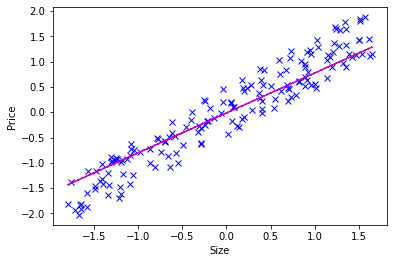

In [86]:
plt.plot(house_sizes_norm, house_prices_norm, "bx")  # bx = blue x
# plot the predicted line
plt.plot(house_sizes_norm, weight * house_sizes_norm - bias, '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

## I see a bunch of equations - but where is the perceptron?

A neural network is just a bunch of operations (summations and activations for now, letter we will see more) chained together. You can represent them via procedural code or object oriented code. Thus far we used procedural code and the logical model we should have can be represented as this:

<!-- 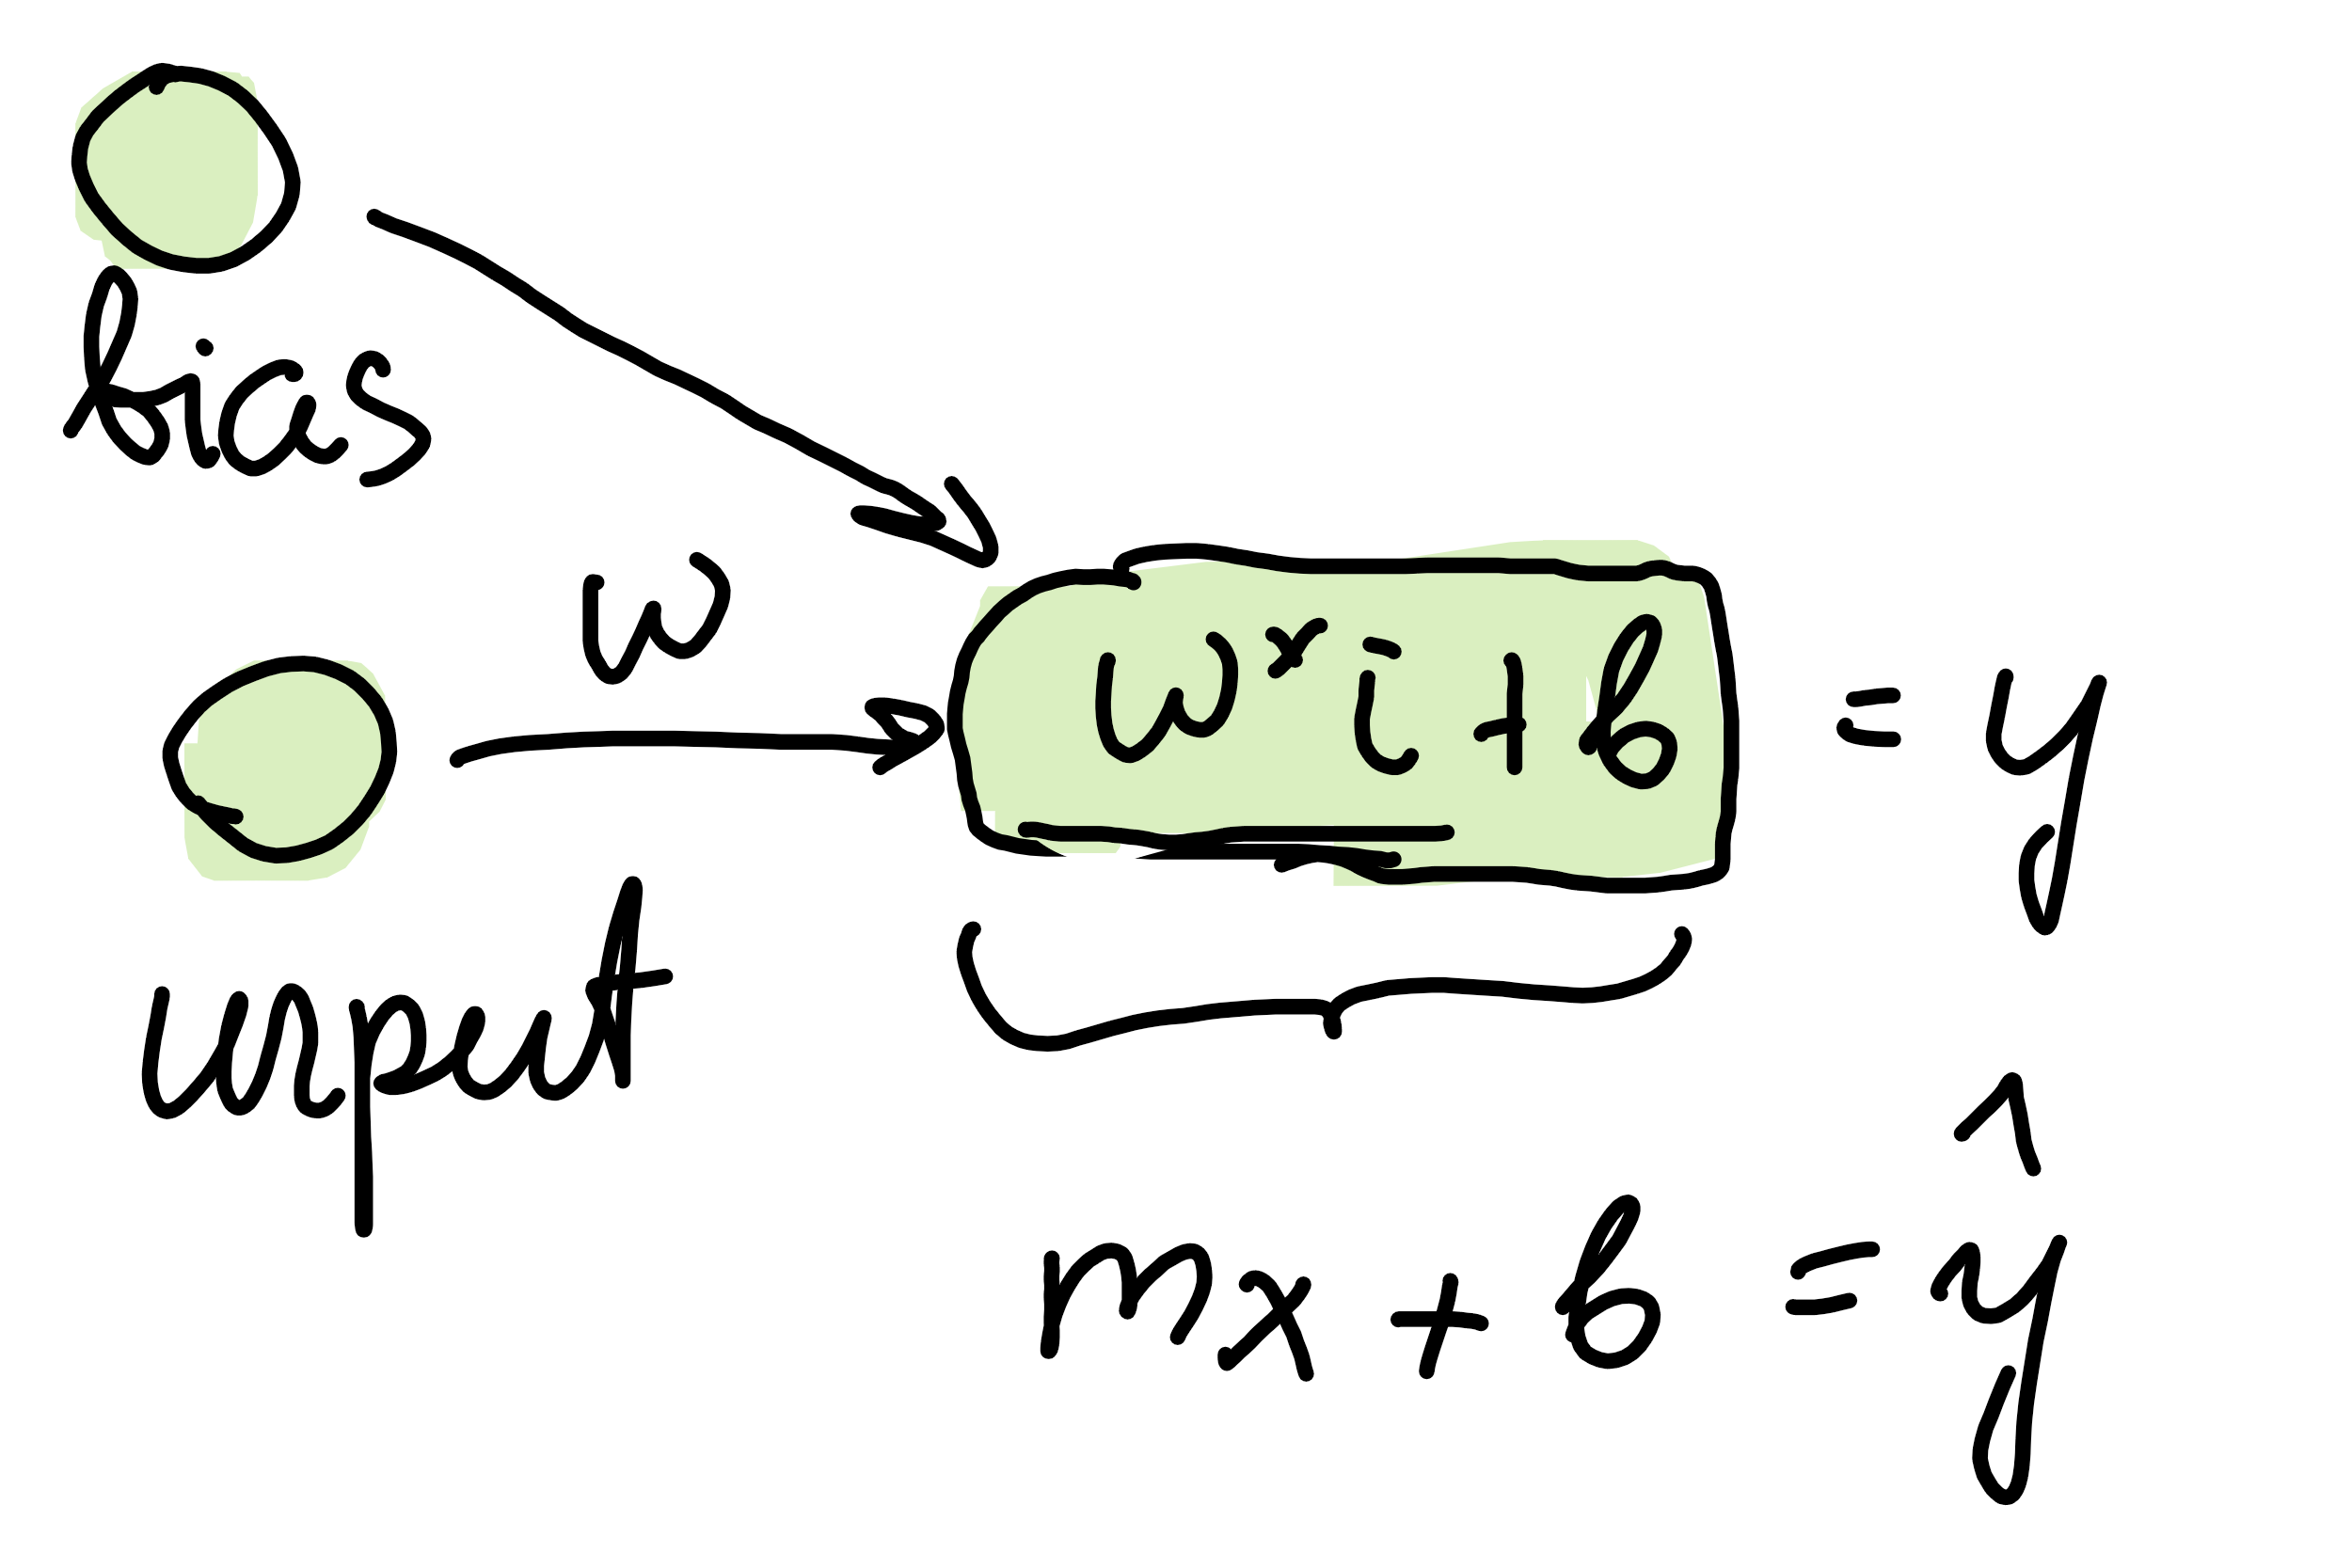 -->

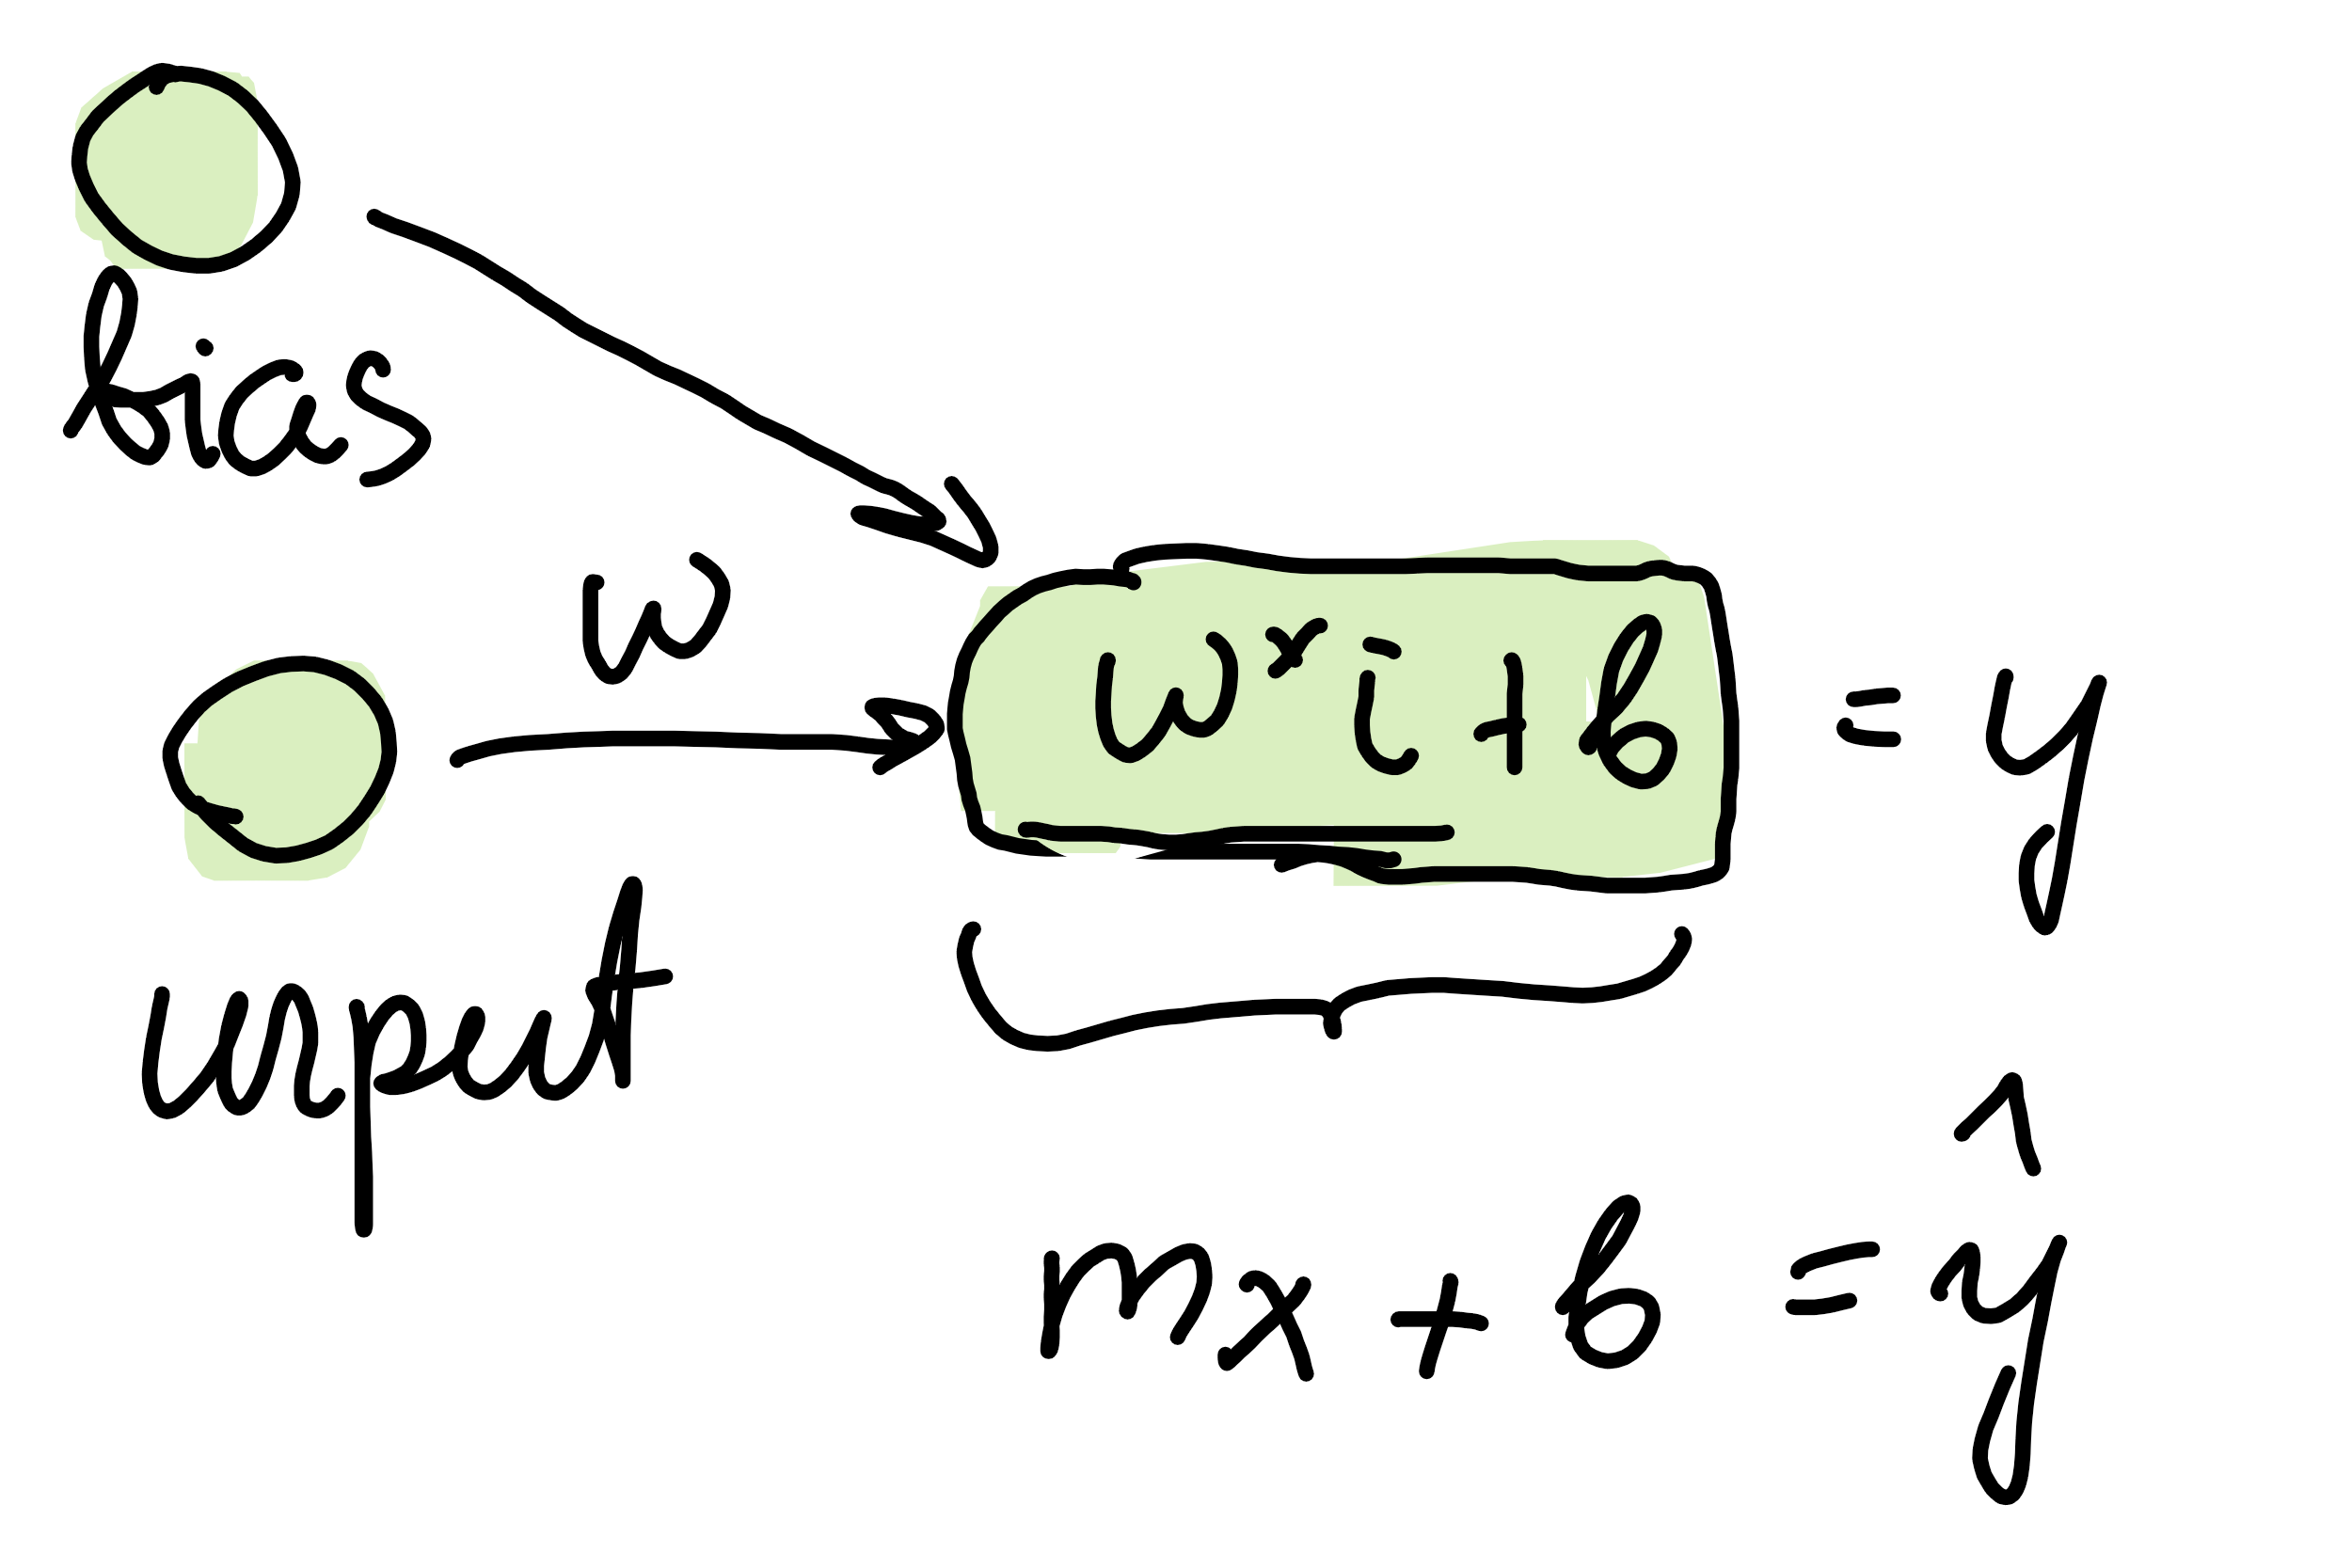

## Introducing the notion of batching

https://stats.stackexchange.com/questions/153531/what-is-batch-size-in-neural-network

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

Advantages of using a batch size < number of all samples:

It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

Typically networks train faster with mini-batches. That's because we update the weights after each propagation. In our example we've propagated 11 batches (10 of them had 100 samples and 1 had 50 samples) and after each of them we've updated our network's parameters. If we used all samples during propagation we would make only 1 update for the network's parameter.

In [87]:
weight = 0.1
bias = 0.1
batch_size = 10

# Test data batching
# print(range(0, len(house_sizes_norm), batch_size))
# print(house_sizes_norm[0:].shape)
# for i in range(0, len(house_sizes_norm), batch_size):
#     print(str(i) + "->" + str(house_sizes_norm[i:i+batch_size].shape))

# training loop
for i in range(0, len(house_sizes_norm), batch_size):
    prediction = house_sizes_norm[i:i+batch_size] * weight + bias
    # need to use advanced error functions (like MSE) and gradient descent - simple difference is not sufficient

## Introducing the notion of epoch

What is an epoch? In neural networks generally, an epoch is a single pass through the full training set. I know it doesn’t make sense in the starting that — passing the entire dataset through a neural network is not enough. And we need to pass the full dataset multiple times to the same neural network. But keep in mind that we are using a limited dataset and to optimise the learning and the graph we are using Gradient Descent which is an iterative process. So, updating the weights with single pass or one epoch is not enough.

As the number of epochs increases, more number of times the weight are changed in the neural network and the curve goes from underfitting to optimal to overfitting curve.

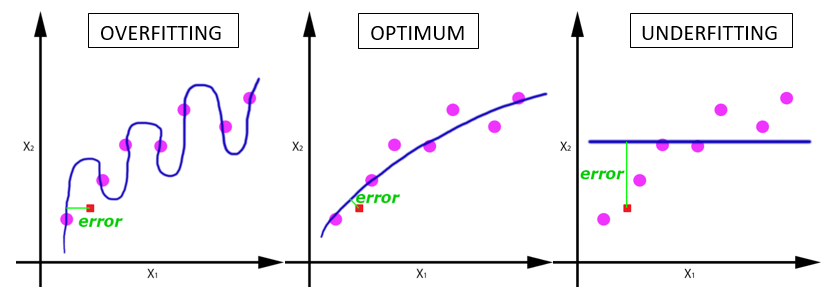

### Implementing epochs in a simple NN

In [96]:
for j in range(20):
    for i in range(len(house_sizes_norm)):
        prediction = house_sizes_norm[i] * weight + bias
        print("price[" + str(i) + "]: " + str(house_prices_norm[i]) + " ;; pred: " + str(prediction) + " ;; error: " + str(house_prices_norm[i] - prediction))
        error = prediction - house_prices_norm[i]
        weight = weight - learning_rate * error * house_sizes_norm[i]
        bias = bias - learning_rate * error

price[0]: -0.41576396084802203 ;; pred: -0.5909839196450472 ;; error: 0.17521995879702512
price[1]: 1.3340338327251349 ;; pred: 1.2968398147463842 ;; error: 0.03719401797875066
price[2]: -0.8135992600241686 ;; pred: -0.543601453752013 ;; error: -0.26999780627215564
price[3]: -0.7911420435570881 ;; pred: -0.9407817926622004 ;; error: 0.14963974910511235
price[4]: 0.6320364711956982 ;; pred: 0.3759692769620519 ;; error: 0.25606719423364627
price[5]: -1.6028752611451575 ;; pred: -1.5096030505491744 ;; error: -0.09327221059598312
price[6]: -0.19876634885001096 ;; pred: -0.5896427316447508 ;; error: 0.3908763827947398
price[7]: 0.00776391648961508 ;; pred: -0.37090103588441076 ;; error: 0.37866495237402586
price[8]: 0.23127031495520375 ;; pred: 0.6762964608704229 ;; error: -0.44502614591521916
price[9]: -0.5168975611074003 ;; pred: -0.7498014289926077 ;; error: 0.23290386788520745
price[10]: -0.49398358769522654 ;; pred: -0.6121709069023882 ;; error: 0.11818731920716163
price[11]: 0.4672614

price[40]: 1.6347702179902261 ;; pred: 1.228327993543127 ;; error: 0.4064422244470991
price[41]: -1.6074047675173313 ;; pred: -1.1432931443151648 ;; error: -0.4641116232021665
price[42]: -0.7873737987600694 ;; pred: -0.713755659887556 ;; error: -0.07361813887251345
price[43]: 1.3027840450650108 ;; pred: 1.2302590055515559 ;; error: 0.0725250395134549
price[44]: -1.0234790762944779 ;; pred: -1.3600813319175895 ;; error: 0.33660225562311163
price[45]: 1.0248093808970622 ;; pred: 0.5761595721507019 ;; error: 0.4486498087463603
price[46]: -1.0056655554358445 ;; pred: -0.8297312998407902 ;; error: -0.17593425559505427
price[47]: -0.9285116947938573 ;; pred: -1.1835352772537264 ;; error: 0.2550235824598691
price[48]: -1.8221185947898766 ;; pred: -1.7184187243035431 ;; error: -0.10369987048633345
price[49]: -0.9502457127645405 ;; pred: -1.1352548826986797 ;; error: 0.18500916993413918
price[50]: -0.4777687161444192 ;; pred: -0.5446177374614372 ;; error: 0.06684902131701798
price[51]: 1.686574

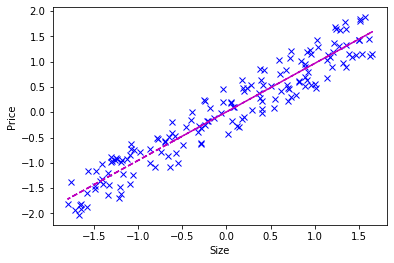

In [97]:
plt.plot(house_sizes_norm, house_prices_norm, "bx")  # bx = blue x
# plot the predicted line
plt.plot(house_sizes_norm, weight * house_sizes_norm - bias, '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

## Denormalization
To predict on real world values, we need to denormalize the data durring the time of prediction. If you know about normalization by now, you might know that, for example scikit learn framework has the tools to normalized and denormalize data. 
https://stackoverflow.com/questions/49696981/keras-using-predict-with-a-model-trained-with-normalized-data

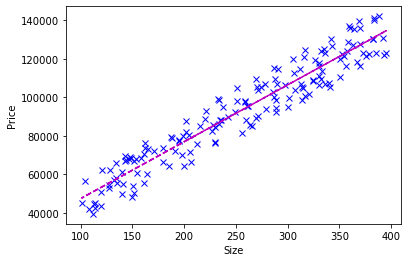

In [98]:
house_sizes_mean = house_sizes.mean()
house_sizes_std = house_sizes.std()

house_prices_mean = house_prices.mean()
house_prices_std = house_prices.std()

plt.plot(house_sizes, house_prices, "bx")  # bx = blue x
# plot the predicted line
# Reverse of normalization (house_sizes - house_sizes.mean()) / house_sizes.std()
plt.plot(house_sizes_norm * house_sizes_std + house_sizes_mean, (weight * house_sizes_norm - bias) * house_prices_std + house_prices_mean , '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

## We followed these steps when training our model
- Data preparation 
- Model definition and forward pass
- Loss calculation
- Weight and bias opimization

## Introducing Tensorflow

First, let's switch to slides for some Tensorflow theory and simple demos to understand what tensorflow is.

### Test / train data spliting

In [3]:
import tensorflow as tf

# define number of training samples, 0.7 = 70%.  
# We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_sizes[:num_train_samples])
train_price = np.asanyarray(house_prices[:num_train_samples:])

train_house_size_norm = normalize(train_house_size)
train_price_norm = normalize(train_price)

# define test data
test_house_size = np.array(house_sizes[num_train_samples:])
test_house_price = np.array(house_prices[num_train_samples:])

test_house_size_norm = normalize(test_house_size)
test_house_price_norm = normalize(test_house_price)

#  Variables that get updated as we descend down the gradient
tf_house_size = 0.0 
tf_price = 0.0

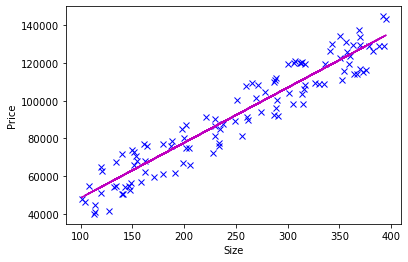

Epoch count 79: Loss value: 0.0898551195859909


In [3]:
class LinearModel:
    def __call__(self, x):
        # 2. Define the operations for the predicting values. We are using the TF API for addition and mult
        return tf.add(tf.multiply(self.Weight, x), self.Bias) # could use: self.Weight * x + self.Bias
    
    def __init__(self):
        self.Weight = tf.Variable(11.0)
        self.Bias = tf.Variable(12.0)

def loss(y, pred): 
    # 3. Define the Loss Function RMSE 
    return tf.reduce_mean(tf.square(y - pred))

# Optimizer learning rate.  The size of the steps down the gradient
def train(linear_model, x, y, lr=0.12):
    with tf.GradientTape() as t:
        current_loss = loss(y, linear_model(x))

    # 4. define a Gradient descent optimizer that will minimize the loss defined in the operation "cost".
    lr_weight, lr_bias = t.gradient(current_loss, [linear_model.Weight, linear_model.Bias])
    linear_model.Weight.assign_sub(lr * lr_weight)
    linear_model.Bias.assign_sub(lr * lr_bias)


linear_model = LinearModel()
Weights, Biases = [], []
epochs = 80
for epoch_count in range(epochs):
    Weights.append(linear_model.Weight.numpy()) 
    Biases.append(linear_model.Bias.numpy())
    real_loss = loss(train_price_norm, linear_model(train_house_size_norm))
    train(linear_model, train_house_size_norm, train_price_norm, lr=0.12)
#     print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")
    
# plot
train_house_size_mean = train_house_size.mean()
train_house_size_std = train_house_size.std()

train_price_mean = house_prices.mean()
train_price_std = house_prices.std()

plt.plot(train_house_size, train_price, "bx")  # bx = blue x
# plot the predicted line
plt.plot(train_house_size_norm * train_house_size_std + train_house_size_mean, linear_model(train_house_size_norm) * train_price_std + train_price_mean , '--m')
plt.ylabel("Price")
plt.xlabel("Size")
plt.show()

# predict
print(f"Epoch count {epoch_count}: Loss value: {real_loss.numpy()}")

## Solving Linear Regression w/ Estimators

In [265]:
import tensorflow as tf

# define number of training samples, 0.7 = 70%.  
# We can take the first 70% since the values are randomized
num_train_samples = math.floor(num_house * 0.7)

# define training data
train_house_size = np.asarray(house_sizes[:num_train_samples])
train_price = np.asanyarray(house_prices[:num_train_samples:])

featcols = [
    tf.feature_column.numeric_column("size")
]

conf = tf.estimator.RunConfig(
    model_dir="./tmp/",
    keep_checkpoint_max=0,
    log_step_count_steps=1000,
    save_summary_steps=1,
    save_checkpoints_secs=1)

model = tf.estimator.LinearRegressor(feature_columns=featcols, config=conf)

INFO:tensorflow:Using config: {'_model_dir': './tmp/', '_tf_random_seed': None, '_save_summary_steps': 1, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 1, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 0, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 1000, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:
import tensorflow as tf
# ATTENTION: if you are running on the GPU you might see an error:
# InternalError:  Blas GEMV launch failed:  m=2, n=32

# Fix it using: set_memory_growth to true
physical_devices = tf.config.list_physical_devices('GPU') 
print(tf.config.list_physical_devices('GPU'))
print(tf.config.list_physical_devices('CPU'))
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.experimental.set_virtual_device_configuration(physical_devices[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])

<pre>
Wed Jul 15 06:35:10 2020
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 431.40       Driver Version: 431.40       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 166... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   47C    P8     3W /  N/A |   6130MiB /  6144MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+

+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU       PID   Type   Process name                             Usage      |
|=============================================================================|
|    0     15216      C   ...rogram Files\Python\Python38\python.exe N/A      |
|    0     18916      C   ...rogram Files\Python\Python38\python.exe N/A      |
+-----------------------------------------------------------------------------+
WARNING: infoROM is corrupted at gpu 0000:01:00.0
</pre>

15216 - was acting up

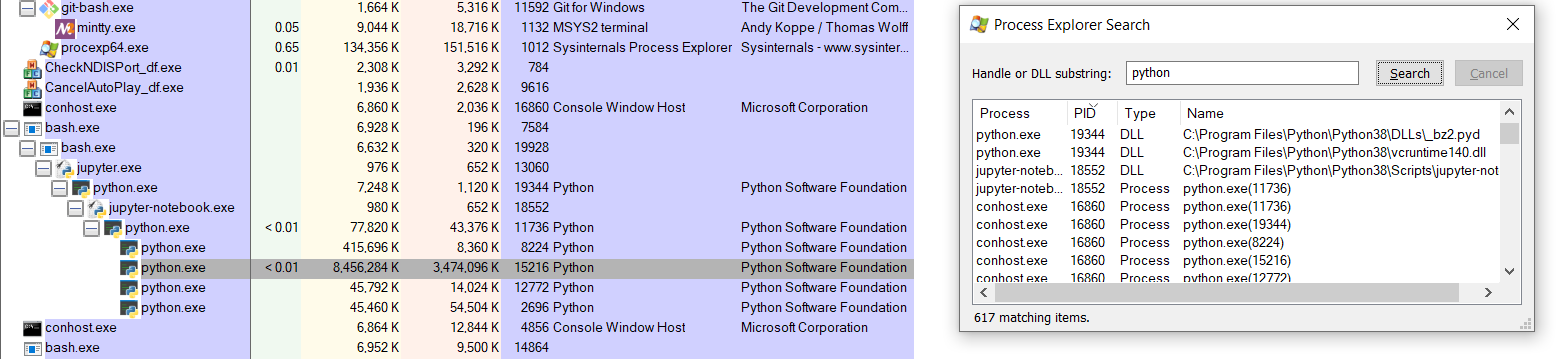

In [266]:
def input_fn_train():
    features = {"size": train_house_size_norm}
    labels = train_price_norm
    return features, labels

# def input_fn_eval:
#   # Returns tf.data.Dataset of (x, y) tuple where y represents label's class
#   # index.
#   pass

def input_fn_predict():
    features = {"size": test_house_size_norm}
    return features

model.train(input_fn=input_fn_train, steps=2000)
# metrics = model.evaluate(input_fn=input_fn_eval)
predictions = model.predict(input_fn=input_fn_predict)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 4000...
INFO:tensorflow:Saving checkpoints for 4000 into ./tmp/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving chec

In [260]:
# print(next(predictions))
# print(next(predictions))
# print(next(predictions))

# WARNING:tensorflow:Input graph does not use tf.data.Dataset or contain a QueueRunner. 
# That means predict yields forever. This is probably a mistake.

# Obtaining the prediction value
print(next(predictions)['predictions'][0])
print(test_house_price_norm[0])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.8542523
0.911930837761119


In [267]:
for pred_dict, expected_price in zip(predictions, test_house_price_norm):
    predicted_price = pred_dict['predictions'][0]
    print('{} -> {}'.format(predicted_price, expected_price))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./tmp/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.854252278804779 -> 0.911930837761119
0.9767258167266846 -> 0.7100378769645618
-1.3380224704742432 -> -1.6978747522055861
-0.7991392612457275 -> -0.43927945974658783
0.7440261840820312 -> 0.25746438576629094
0.854252278804779 -> 0.3879779158935087
0.

... Again, training on denormalized data will take for ever ...
<pre>
INFO:tensorflow:global_step/sec: 1354.96
INFO:tensorflow:loss = 3059303200.0, step = 179800 (0.074 sec)
INFO:tensorflow:global_step/sec: 1412.22
INFO:tensorflow:loss = 3058204000.0, step = 179900 (0.072 sec)
INFO:tensorflow:global_step/sec: 1354.96
INFO:tensorflow:loss = 3057105000.0, step = 180000 (0.074 sec)
INFO:tensorflow:global_step/sec: 1373.52
INFO:tensorflow:loss = 3056007400.0, step = 180100 (0.072 sec)
</pre>

## Introducing Keras

## Solving linear regression w/ Keras